In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape,y_train.shape, "*********" , X_test.shape,y_test.shape 

((60000, 28, 28), (60000,), '*********', (10000, 28, 28), (10000,))

In [4]:
X_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [5]:
y_train[1] 

0

In [6]:

class_labels = ["T-shirt/top" ,	"Trouser" ,	"Pullover" ,	"Dress"	, "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag"	, "Ankle boot"]

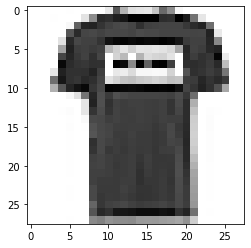

In [7]:
plt.imshow(X_train[1],cmap='Greys')


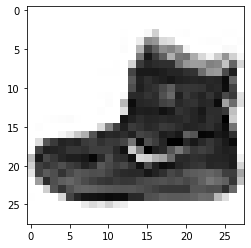

In [8]:
plt.imshow(X_train[0],cmap='Greys')

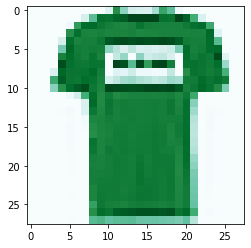

In [9]:
plt.imshow(X_train[1],cmap='BuGn')

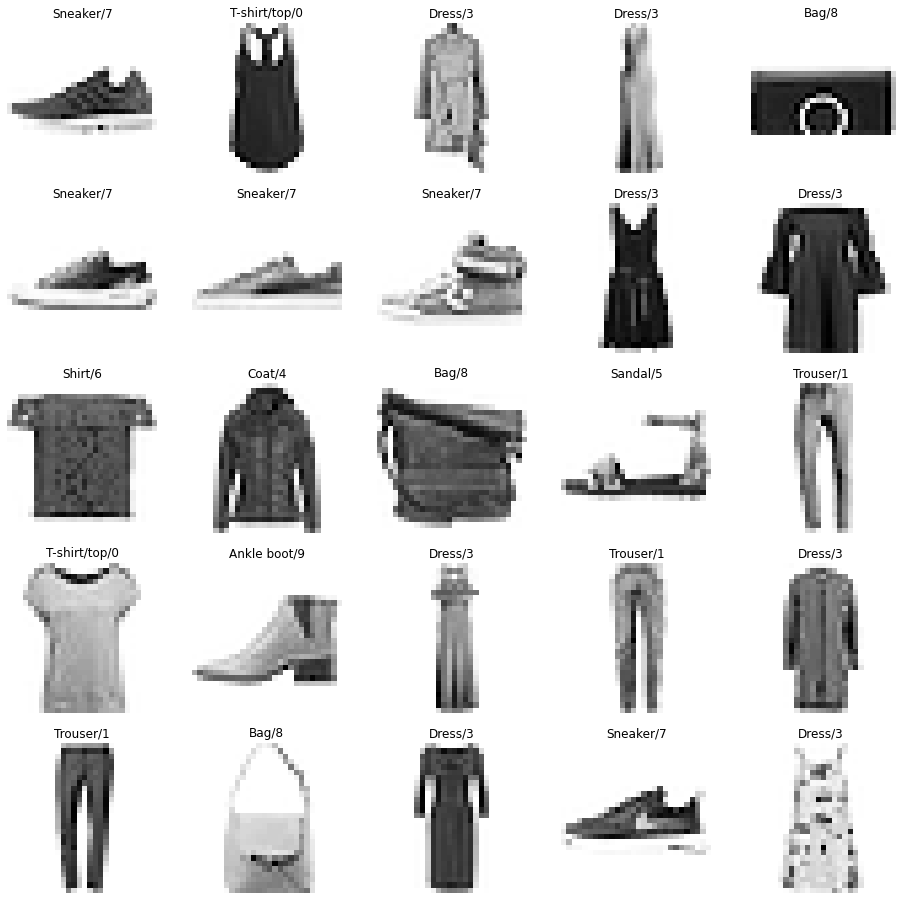

In [10]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j=j+1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{}/{}'.format(class_labels[y_train[i]],y_train[i]))


In [11]:
X_train.ndim

3

In [12]:
X_train = np.expand_dims(X_train,-1)

In [13]:
X_train.ndim

4

In [14]:
X_train = X_train/255
X_test= X_test/255

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [16]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

STEP 3: Building the CNN Model

In [30]:
cnn_model=keras.models.Sequential([keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                                   keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),padding='valid',activation='relu'),
                                  keras.layers.MaxPooling2D(pool_size=(2,2)),
                                   keras.layers.Flatten(),
                                    keras.layers.Dense(units=128,activation='relu'),
                                    keras.layers.Dropout(0.25),
                                   keras.layers.Dense(units=256,activation='relu'),
                                    keras.layers.Dropout(0.25),
                                   keras.layers.Dense(units=10,activation='softmax')])


 


In [ ]:
model.summary()

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=20,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

In [21]:
y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 3s 8ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.05, 0.05, 0.  ]], dtype=float32)

In [22]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [23]:
model.evaluate(X_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

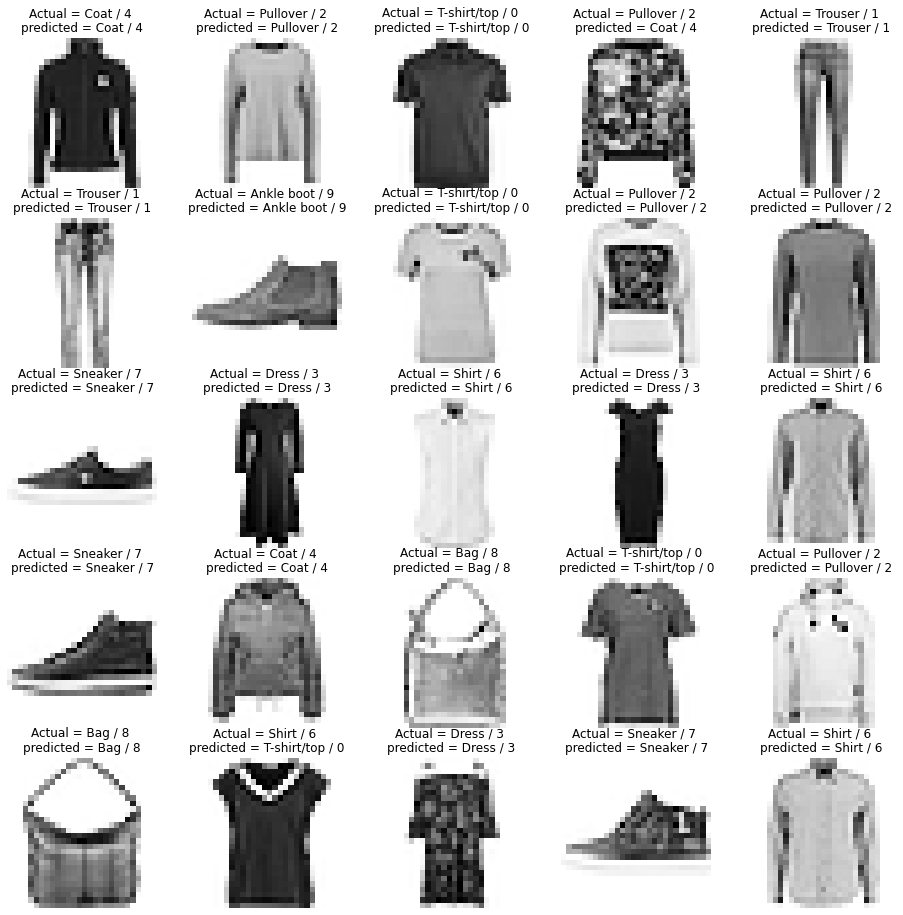

In [24]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25): 
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap='Greys')
  plt.title('Actual = {} / {} \npredicted = {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [25]:
"""##Confusion Matrix"""

'##Confusion Matrix'

In [26]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test,y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.84      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.86      0.82      0.84      1000
       Dress       0.92      0.91      0.91      1000
        Coat       0.79      0.91      0.84      1000
      Sandal       0.96      0.98      0.97      1000
       Shirt       0.75      0.69      0.72      1000
     Sneaker       0.97      0.94      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



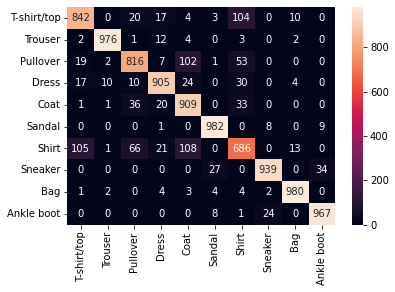

In [27]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
from sklearn.metrics import classification_report 
cr = classification_report(y_test, y_pred_labels,target_names=class_labels) 
print(cr)

In [28]:
""""# Save Model""" 

'"# Save Model'

In [29]:
model.save('fashion_mnist_cnn_models.h5')